# Redes neuronales en Keras: Fashion-MNIST

## Preparar los datos

In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
%matplotlib inline

#https://aihub.cloud.google.com/u/0/p/products%2F02f6875e-2645-4da9-9516-347f4cac3ff3

2.0.0


In [7]:
# carga de datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [10]:
print("train_images.shape: ", train_images.shape)
print("len(train_labels): ", len(train_labels))
print("test_images.shape: ", test_images.shape)
print("len(test_labels): ", len(test_labels))

train_images.shape:  (60000, 28, 28)
len(train_labels):  60000
test_images.shape:  (10000, 28, 28)
len(test_labels):  10000


In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

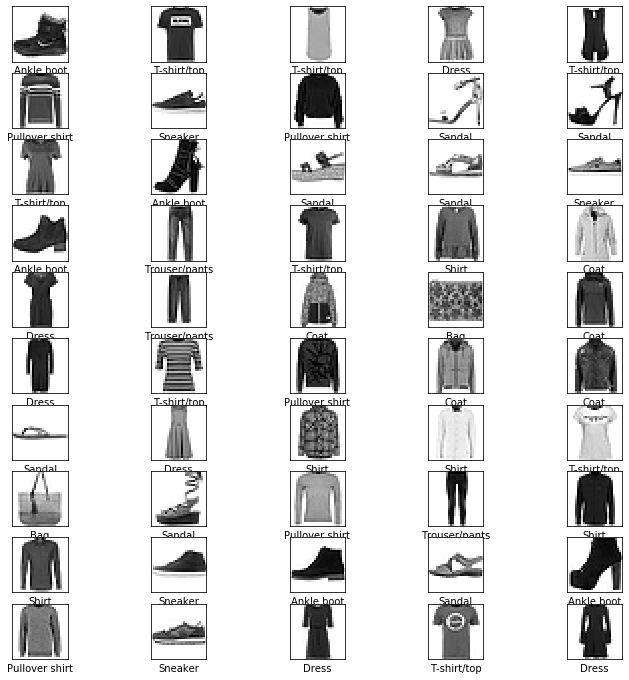

In [15]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Definir modelo

In [20]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### Configurar el modelo

In [23]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=[('accuracy')])

## Entrenamiento del modelo

In [25]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 1.8034 - accuracy: 0.4739
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 1.2663 - accuracy: 0.6131
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1.0379 - accuracy: 0.6691
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.9038 - accuracy: 0.7179
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8129 - accuracy: 0.7395


## Evaluación del modelo

In [26]:
%%capture
test_loss, test_acc = model.evaluate(test_images, test_labels);

In [27]:
print('Test accuracy: ', test_acc)

Test accuracy:  0.7481


### Generación de predicciones

In [28]:
predictions = model.predict(test_images)

In [29]:
predictions[5]

array([0.01144392, 0.8094503 , 0.00427957, 0.10277368, 0.04162338,
       0.00292604, 0.01871257, 0.0045588 , 0.00190423, 0.00232751],
      dtype=float32)

In [30]:
test_labels[5]

1

In [56]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#007700")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')

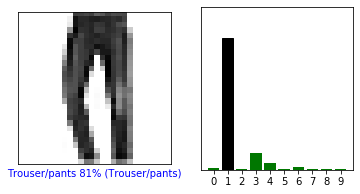

In [61]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

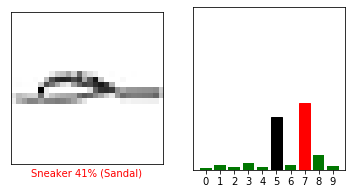

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [45]:
len(predictions)

10000

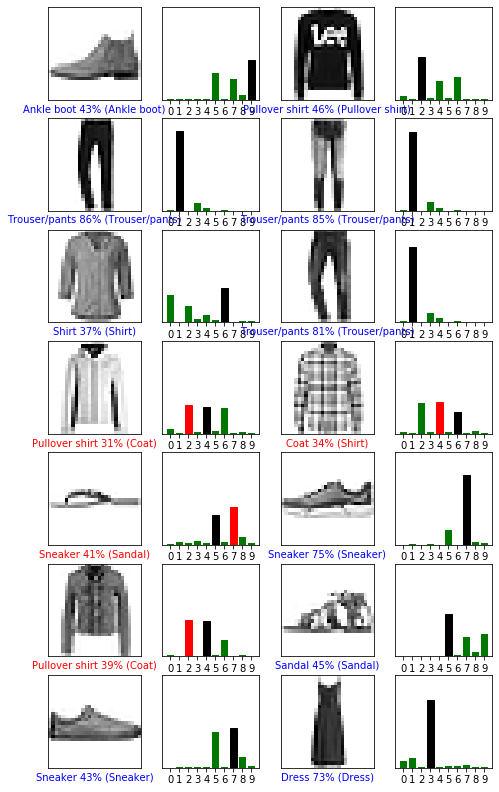

In [59]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.show()

## Mejorar el modelo

In [64]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=[('accuracy')])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels);
print('\nTest accuracy: ', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 1.0561 - accuracy: 0.7139
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5737 - accuracy: 0.8229
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4806 - accuracy: 0.8399
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4445 - accuracy: 0.8476
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4243 - accuracy: 0.8526
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy:  0.84
